In [1]:
# Importing necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince
from kmodes.kmodes import KModes

In [2]:
# Now load the encoded dataset.
df = pd.read_csv('cleaned_retractions35215_V10.csv')
df.iloc[:,:11].head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate
0,50792,A fractional order nonlinear model of the love...,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,8/1/2024,3/4/2023
1,50782,Investigation of automotive digital mirrors er...,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,6/1/2024,12/1/2021
2,50781,Optical spectroscopic analysis of bandpass fil...,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,9/1/2024,5/5/2020
3,50731,THz Design Variable Estimation by Deep Optimiz...,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,Book Chapter/Reference Work;,27/09/2022,27/09/2022
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,Research Article;,16/08/2023,30/08/2022


In [3]:
df.iloc[:,11:].head()

,Reason,CitationCount,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,Duplication of Article;Euphemisms for Duplicat...,5,280,2,3,7,Academic misconduct and no scientific error;Sc...,1,0,304,0,The most serious
1,Fake Peer Review;Investigation by Journal/Publ...,2,1089,3,2,5,Scientific error and academic misconduct;Scien...,1,0,1115,0,The most serious
2,Concerns/Issues with Peer Review;Fake Peer Rev...,14,1344,5,5,6,Scientific error and academic misconduct;Scien...,1,0,1367,0,The most serious
3,Date of Retraction/Other Unknown;Euphemisms fo...,0,0,4,3,5,Academic misconduct and no scientific error;No...,1,0,492,0,Serious
4,Concerns/Issues About Data;Concerns/Issues Abo...,2,351,8,4,10,Scientific error and no academic misconduct;No...,3,1,520,0,Less serious


In [4]:
df.shape

(35215, 23)

In [5]:
# drop unnecessary columns
columns_to_drop = ['Record ID', 'Title', 'RetractionDate', 'OriginalPaperDate', 'AuthorCount', 'SubjectCount', 'ReasonCount', 'Reason_group', 'CountryCount', 'LevelOfSeriousness', 'CitationCount', 'ArticleAge', 'TimeToRetraction']
df = df.drop(columns=columns_to_drop, axis=1)
df

,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,Reason,IsInternationalCollaboration,IsPaywalled
0,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,Duplication of Article;Euphemisms for Duplicat...,0,0
1,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,Fake Peer Review;Investigation by Journal/Publ...,0,0
2,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,Concerns/Issues with Peer Review;Fake Peer Rev...,0,0
3,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,Book Chapter/Reference Work;,Date of Retraction/Other Unknown;Euphemisms fo...,0,0
4,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,Research Article;,Concerns/Issues About Data;Concerns/Issues Abo...,1,0
...,...,...,...,...,...,...,...,...,...,...
35210,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,Clinical Study;Research Article;,Falsification/Fabrication of Data;Investigatio...,0,0
35211,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;AndrÃ© M Grilo;Paulo J P da ...,Research Article;,Duplication of Image;Manipulation of Images;,0,0
35212,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBBâInstitute for Biotechnology and Bioengin...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;SÃ­lvia A Sousa;AndrÃ© M Gri...,Research Article;,Duplication of Image;Error in Image;,0,0
35213,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Pathology, University of Pittsbu...",Journal of Cellular Biochemistry,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,Research Article;,Duplication of Image;Falsification/Fabrication...,0,0


In [6]:
df

,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,Reason,IsInternationalCollaboration,IsPaywalled
0,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,Duplication of Article;Euphemisms for Duplicat...,0,0
1,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,Fake Peer Review;Investigation by Journal/Publ...,0,0
2,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,Concerns/Issues with Peer Review;Fake Peer Rev...,0,0
3,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,Book Chapter/Reference Work;,Date of Retraction/Other Unknown;Euphemisms fo...,0,0
4,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,Research Article;,Concerns/Issues About Data;Concerns/Issues Abo...,1,0
...,...,...,...,...,...,...,...,...,...,...
35210,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,Clinical Study;Research Article;,Falsification/Fabrication of Data;Investigatio...,0,0
35211,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;AndrÃ© M Grilo;Paulo J P da ...,Research Article;,Duplication of Image;Manipulation of Images;,0,0
35212,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBBâInstitute for Biotechnology and Bioengin...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;SÃ­lvia A Sousa;AndrÃ© M Gri...,Research Article;,Duplication of Image;Error in Image;,0,0
35213,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Department of Pathology, University of Pittsbu...",Journal of Cellular Biochemistry,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,Research Article;,Duplication of Image;Falsification/Fabrication...,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 232750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 232750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 232750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 232750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 232750.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 232074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5069, cost: 225994.0
Run 2, iteration: 2/100, moves: 1006, cost: 225815.0
Run 2, iter

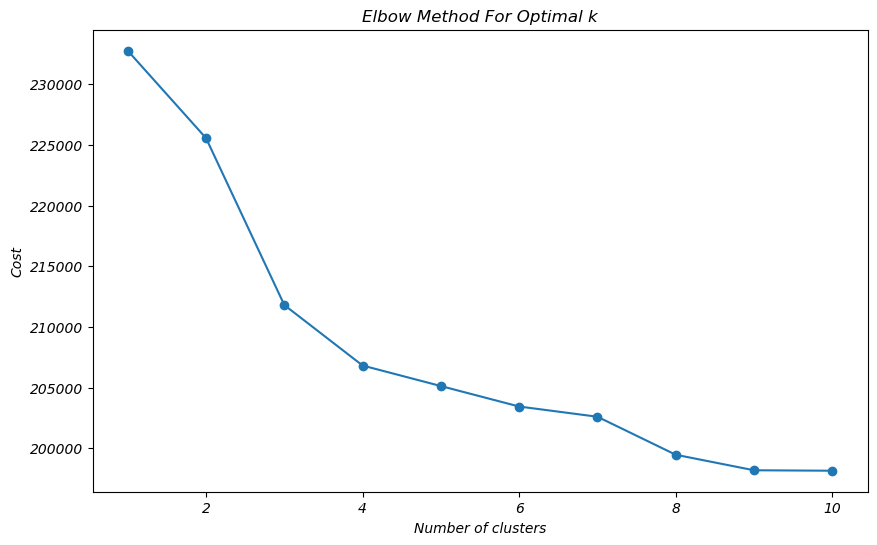

In [7]:
# Range of clusters to try
cluster_range = range(1, 11)

# Placeholder for the costs
costs = []

for k in cluster_range:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    km.fit(df)
    costs.append(km.cost_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, costs, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

In [8]:
# Set the number of clusters
k = 4

# Initialize the K-modes model
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)

# Fit the model on your dataset
clusters = km.fit_predict(df)

# Adding the cluster labels to your dataframe
df['Cluster'] = clusters

# Evaluation: Review the model's cost and the distribution of data points across clusters
print(f'Model cost: {km.cost_}')
print('Distribution of data points across clusters:')
print(df['Cluster'].value_counts())

# Additional: Inspect the centroids
print('Centroids:')
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6880, cost: 210851.0
Run 1, iteration: 2/100, moves: 35, cost: 210850.0
Run 1, iteration: 3/100, moves: 0, cost: 210850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2621, cost: 211811.0
Run 2, iteration: 2/100, moves: 3, cost: 211811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8458, cost: 207464.0
Run 3, iteration: 2/100, moves: 3943, cost: 206550.0
Run 3, iteration: 3/100, moves: 6918, cost: 206449.0
Run 3, iteration: 4/100, moves: 253, cost: 206442.0
Run 3, iteration: 5/100, moves: 0, cost: 206442.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 216, cost: 211351.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves

The reasons for retractions in Cluster 1 are the most common, possibly due to the most frequent issues in research and publication processes.

Clusters 0 and 2 focus on articles in the Computer Science and Data Science fields, mostly from China, indicating a geographical and disciplinary concentration of retractions. Cluster 2 highlights issues such as data concerns, referencing/attribution concerns, and unreliable results, which can be monitored in the future to minimise retraction risks.

Cluster 1 concentrate on articles from Biology and Medical fields, with the primary cause of retraction being article duplication. It means scientific integrity and research ethics in these fields need greater attention.

#### Insights for Future retractions

Focused Monitoring: The fields and specific issues from the clusters indicate the need to monitor problems like unreliable data, article duplication, and referencing issues, especially in disciplines with a high number of retractions such as Computer Science, Technology and Biology - Cancer, Cellular, Genetics.

Efficient review systems: Develop more effective article review systems, utilising technology to detect duplication, data issues, and ensure the authenticity of published research.